In [0]:
!pip install descarteslabs
!descarteslabs auth login

In [0]:

import descarteslabs as dl
import warnings
warnings.simplefilter('ignore')
import numpy as np
from numpy import ma


In [0]:

#Determined AOI from Viewer 
#https://viewer.descarteslabs.com/?config=1f1a8a95bc2f524b0cbc55d4b7df5680524c24d6

aoi = {'coordinates': [[[-78.39441955089568,17.95050902600569],
   [-77.72161960601807,17.95050902600569],
   [-77.72161960601807,18.595241324176442],
   [-78.39441955089568,18.595241324176442],
   [-78.39441955089568,17.95050902600569]]],
 'type': 'Polygon'}

In [4]:
#Use Scenes to search over the AOI 
#note: here were are setting the cloud_fraction

scenes, ctx = dl.scenes.search(aoi,
                               products=["landsat:LC08:01:T1:TOAR"],
                               start_datetime="2015-01-01",
                               end_datetime="2017-12-31",
                               cloud_fraction=0.15,
                               limit=20)


18

18

In [5]:
print(scenes)
         

SceneCollection of 11 scenes
  * Dates: May 04, 2017 to Dec 23, 2017
  * Products: landsat:LC08:01:T1:TOAR: 11


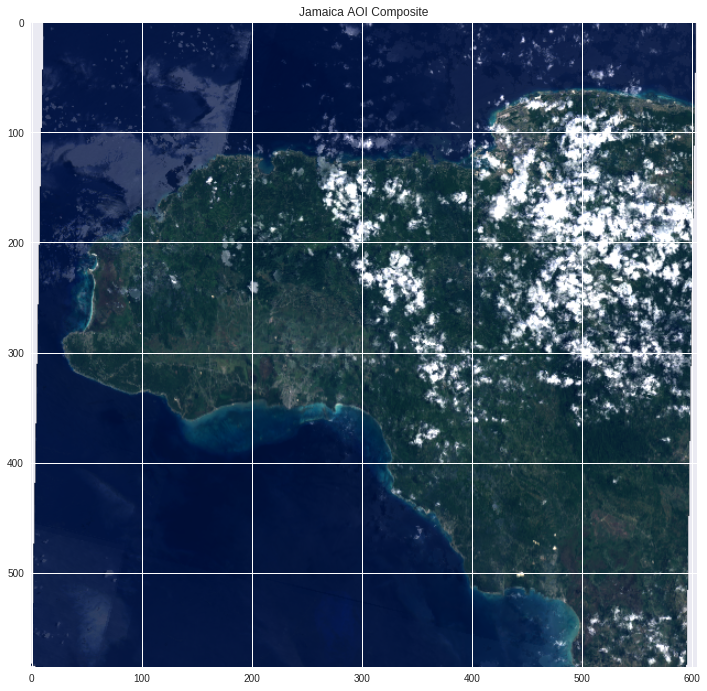

In [6]:
# Make a lower-resolution GeoContext
ctx_lowres = ctx.assign(resolution=120)

# Request a NumPy stack of all the scenes using the same GeoContext
arr_stack = scenes.stack("red green blue", ctx_lowres)

# Composite the scenes based on the median pixel value
composite = np.ma.median(arr_stack, axis=0)
dl.scenes.display(composite, title="Jamaica AOI Composite")

In [0]:
scenes_1, ctx = dl.scenes.search(
    aoi=aoi, 
    products='landsat:LC08:01:T1:TOAR',
    start_datetime='2017-01-01', 
    end_datetime='2017-12-31',
)



In [11]:
#determine how many scenes are available over AOI 
print("There are currently {} scenes over your area of interest.".format(len(scenes_1)))

There are currently 37 scenes over your area of interest.


In [0]:
#change the resoltuion of your GeoContext 

ctx = ctx.assign(resolution=60)

In [0]:
stack = scenes_1.stack(
    'red green blue derived:visual_cloud_mask', 
    ctx, processing_level='surface')

# stack[scenes,bands,rows,cols]
rgb = stack[:,[0,1,2],:,:]  # select the RGB bands
mask = stack[:,[3,3,3],:,:] # copy the mask across all bands

In [0]:
rgb_masked = ma.masked_where(mask, rgb)

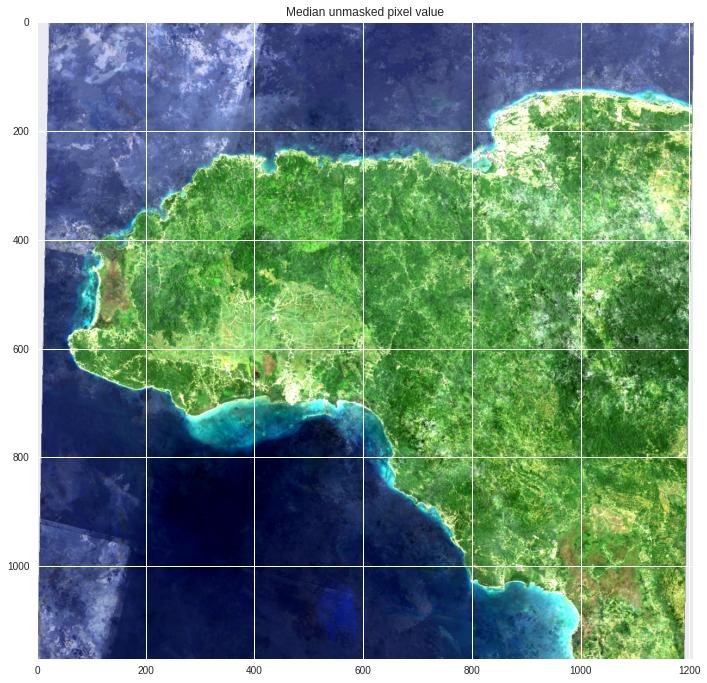

In [15]:
dl.scenes.display(ma.median(rgb_masked, axis=0), 
                  title="Median unmasked pixel value")